In [59]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import torch
import torch.nn as nn
import torch.optim

In [60]:
# Parameters
beta = 0.2
gamma = 0.1
n = 10
tau = 17
t_max = 300
dt = 0.1
history = 1.2  # Initial condition for t < 0

In [61]:
# Time range
time = np.arange(0, t_max, dt)
x = np.zeros(len(time))

# Initial history (for t < 0, assume a constant value)
x[: int(tau / dt)] = history

In [62]:
# Euler method to integrate the Mackey-Glass equation
for t in range(int(tau/dt), len(time) - 1):
    x_t_tau = x[t - int(tau/dt)]  # Value of x(t - tau)
    x[t + 1] = x[t] + dt * (beta * x_t_tau / (1 + x_t_tau**n) - gamma * x[t])

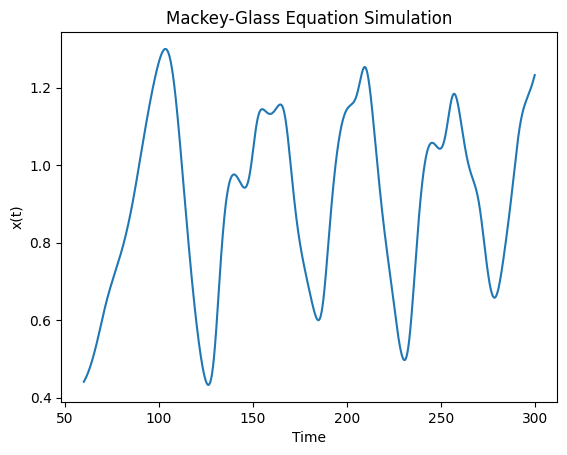

In [63]:
# Plot the generated data
plt.plot(time[600:], x[600:])
plt.xlabel('Time')
plt.ylabel('x(t)')
plt.title('Mackey-Glass Equation Simulation')
plt.show()

In [65]:
from scipy.interpolate import interp1d
import numpy as np

# Function to interpolate past values based on known history and current states
def past_values_interpolator(past_time, current_time, time_history, state_history, history_func):
    """
    Interpolates to get x(t - tau).
    - If past_time < 0, use the history_func (assumed constant or predefined).
    - If past_time >= 0, interpolate based on the stored states.
    
    Parameters:
    - past_time: The time point we want to evaluate (t - tau).
    - current_time: The current time point.
    - time_history: The array of past times for which we have stored states.
    - state_history: The array of past states corresponding to the time history.
    - history_func: A function for t < 0 (the history function).
    
    Returns:
    - The interpolated or historical value of x(t - tau).
    """
    if past_time < 0:
        # For past times, return history function (constant or any predefined rule)
        return history_func(past_time)
    else:
        # For non-negative past_time, interpolate using state history
        if len(time_history) == 0 or len(state_history) == 0:
            raise ValueError("State and time history must not be empty for interpolation.")
        
        # Ensure that we can interpolate for past_time in the valid range
        if past_time > time_history[-1]:
            raise ValueError(f"Cannot interpolate for past_time {past_time}, which is beyond current history.")
        
        # Use linear interpolation on the recorded states (time_history, state_history)
        interpolator = interp1d(time_history, state_history, kind='linear', fill_value="extrapolate")
        
        # Return the interpolated state value at past_time
        return interpolator(past_time)

# Example usage
def constant_history(t):
    return 1.2  # Example constant history for t < 0

# Simulated time and state history
time_history = np.array([0, 1, 2, 3, 4, 5])
state_history = np.array([1.2, 0.9, 0.8, 0.7, 0.65, 0.6])

# Example for past_time < 0 (before time starts)
print(past_values_interpolator(-5, 3, time_history, state_history, constant_history))

# Example for past_time >= 0 (interpolated from history)
print(past_values_interpolator(2.5, 3, time_history, state_history, constant_history))


1.2
0.75
